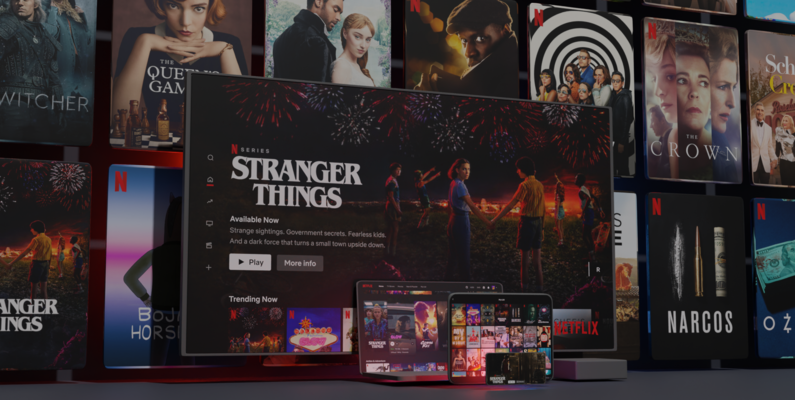

# **Project Tutorial: Netflix Data Cleaning and Analysis**

## **I. Project Descripion:**

**This tutorial project focuses on cleaning and analysis of the Netflix dataset downloaded from Kaggle.** [Datasource](https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization)

## **II. Dataset Description:**

**Netflix is a popular streaming service site that offers a large variety of movies, TV shows, and original contents. The data is made of contents from _2008 to 2021_**

## 1. **Loading the Dependencies:**

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)
print("All libraries loaded successfully")

All libraries loaded successfully


## **2. Loading Dataset**

In [210]:
netflix = pd.read_csv("netflix1.csv")

## 3. Feature Enginering Process: **_Understanding Dataset_**
 * Head or First 5 rows of data
 * Size of dataset: shape
 * Data columns
 * Data types and the number of these categorical: Nominal and Ordinal data types:
 * Information about dataset
 * Statistical description of dataset
 * Checking for NaN or missing values and sort in ascending order for clarity

### **i. Head or First 5 rows of data**

In [211]:
netflix.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### **ii. Size of Dataset: Shape**

In [212]:
netflix.shape

(8790, 10)

#### **_Observation_:** The dataset has **8790 rows** and **10 feature columns**

### **iii. Data columns**

In [213]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

### **iv. Data types and the number of these categorical: Nominal and Ordinal data types**

In [214]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [215]:
categorical_col = netflix.select_dtypes(include=['object']).columns.tolist()

In [216]:
numerical_col = netflix.select_dtypes(include=['number']).columns.tolist()

In [217]:
categorical_col

['show_id',
 'type',
 'title',
 'director',
 'country',
 'date_added',
 'rating',
 'duration',
 'listed_in']

In [218]:
len(categorical_col)

9

In [219]:
numerical_col 

['release_year']

#### **_Observation_:** We have **_9 categorical columns_** of the dataset with **_1 being numerical_**

### **v. Information about Dataset**

In [220]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


#### **_Observation_:** All columns of the dataset have **8790 non-null** values and since the dataset itself has a total of 8790 rows it implies there **_no null values in the any of the feature columns_**

## 4. Feature Enginering Process: **_First Data Cleaning Steps_**

* Deleting redundant columns.
* Renaming the columns.
* Dropping duplicates.
* Remove the NaN values from the dataset
* Cleaning individual columns.
* Check for some more Transformations

### **i. Deleting redundant columns**.

In [221]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [222]:
netflix.drop(columns = ["rating"], axis = 1, inplace = True) # Dropped off the rating column

In [223]:
netflix.head()

,show_id,type,title,director,country,date_added,release_year,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,125 min,"Dramas, Independent Movies, International Movies"


### **ii. Renaming the columns**.

In [224]:
Renamed_columns = []
for x in netflix.columns:
    Renamed_columns.append(x.title())

In [225]:
Renamed_columns

['Show_Id',
 'Type',
 'Title',
 'Director',
 'Country',
 'Date_Added',
 'Release_Year',
 'Duration',
 'Listed_In']

In [226]:
netflix.columns = Renamed_columns

In [227]:
netflix.head()

,Show_Id,Type,Title,Director,Country,Date_Added,Release_Year,Duration,Listed_In
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,125 min,"Dramas, Independent Movies, International Movies"


### **iii. Dropping Duplicates**.

In [228]:
netflix.duplicated(keep ='first').value_counts() # General duplicates

False    8790
Name: count, dtype: int64

#### **Observation**: No duplicates found

### **iv. Check for Some More Transformations**

In [229]:
netflix.columns

Index(['Show_Id', 'Type', 'Title', 'Director', 'Country', 'Date_Added',
       'Release_Year', 'Duration', 'Listed_In'],
      dtype='object')

In [230]:
netflix.Show_Id.unique()

array(['s1', 's3', 's6', ..., 's8801', 's8784', 's8786'], dtype=object)

In [231]:
netflix["Show_Id"] = netflix["Show_Id"].str.replace("s","") # Replaced all "s" with empty string

In [232]:
netflix.head()

,Show_Id,Type,Title,Director,Country,Date_Added,Release_Year,Duration,Listed_In
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,90 min,Documentaries
1,3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,91 min,"Children & Family Movies, Comedies"
4,8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,125 min,"Dramas, Independent Movies, International Movies"


In [233]:
netflix["Show_Id"] = netflix["Show_Id"].astype(int)

In [234]:
netflix.dtypes

Show_Id          int32
Type            object
Title           object
Director        object
Country         object
Date_Added      object
Release_Year     int64
Duration        object
Listed_In       object
dtype: object

In [235]:
netflix["Date_Added"] = netflix["Date_Added"].str.replace("/","-") # Replaced the "/" with "-"

In [236]:
netflix.head(5) # loaded first 5 rows

,Show_Id,Type,Title,Director,Country,Date_Added,Release_Year,Duration,Listed_In
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9-25-2021,2020,90 min,Documentaries
1,3,TV Show,Ganglands,Julien Leclercq,France,9-24-2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,9-24-2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9-22-2021,2021,91 min,"Children & Family Movies, Comedies"
4,8,Movie,Sankofa,Haile Gerima,United States,9-24-2021,1993,125 min,"Dramas, Independent Movies, International Movies"


In [237]:
netflix["Country"].value_counts().sort_values()

Country
Soviet Union         1
Paraguay             1
Somalia              1
Cyprus               1
Puerto Rico          1
                  ... 
Not Given          287
Pakistan           421
United Kingdom     638
India             1057
United States     3240
Name: count, Length: 86, dtype: int64

In [238]:
netflix["Country"].value_counts().sort_values()

Country
Soviet Union         1
Paraguay             1
Somalia              1
Cyprus               1
Puerto Rico          1
                  ... 
Not Given          287
Pakistan           421
United Kingdom     638
India             1057
United States     3240
Name: count, Length: 86, dtype: int64

In [239]:
netflix_new = netflix["Country"].value_counts().reset_index()
netflix_new[netflix_new["Country"] == "United States"]

,Country,count
0,United States,3240


In [240]:
netflix_new[netflix_new["Country"] == "Hungary"]

,Country,count
53,Hungary,5


In [241]:
netflix_new[netflix_new["Country"] == "Turkey"]

,Country,count
13,Turkey,112


In [242]:
netflix.head()

,Show_Id,Type,Title,Director,Country,Date_Added,Release_Year,Duration,Listed_In
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9-25-2021,2020,90 min,Documentaries
1,3,TV Show,Ganglands,Julien Leclercq,France,9-24-2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,9-24-2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9-22-2021,2021,91 min,"Children & Family Movies, Comedies"
4,8,Movie,Sankofa,Haile Gerima,United States,9-24-2021,1993,125 min,"Dramas, Independent Movies, International Movies"


### **v. Exporting Cleaned Dataset**

In [243]:
netflix.to_csv("Cleaned_netflix.csv", index = False)

### **Loading the Cleaned Dataset**

In [251]:
Cleaned_netflix = pd.read_csv("Cleaned_netflix.csv")

In [253]:
Cleaned_netflix.reset_index(inplace = True)

In [254]:
Cleaned_netflix.head()

,index,Show_Id,Type,Title,Director,Country,Date_Added,Release_Year,Duration,Listed_In
0,0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9-25-2021,2020,90 min,Documentaries
1,1,3,TV Show,Ganglands,Julien Leclercq,France,9-24-2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,2,6,TV Show,Midnight Mass,Mike Flanagan,United States,9-24-2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9-22-2021,2021,91 min,"Children & Family Movies, Comedies"
4,4,8,Movie,Sankofa,Haile Gerima,United States,9-24-2021,1993,125 min,"Dramas, Independent Movies, International Movies"


In [255]:
Cleaned_netflix.drop(columns = ["index"], inplace = True)

In [256]:
Cleaned_netflix.head()

,Show_Id,Type,Title,Director,Country,Date_Added,Release_Year,Duration,Listed_In
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9-25-2021,2020,90 min,Documentaries
1,3,TV Show,Ganglands,Julien Leclercq,France,9-24-2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,9-24-2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9-22-2021,2021,91 min,"Children & Family Movies, Comedies"
4,8,Movie,Sankofa,Haile Gerima,United States,9-24-2021,1993,125 min,"Dramas, Independent Movies, International Movies"
